# 🍷 Анализ датасета Red Wine Quality (Cortez et al. 2009)

Источник данных: [Kaggle Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
%matplotlib inline


In [7]:

# Загружаем локальный CSV
df = pd.read_csv('winequality-red.csv', sep=';')

print("=== Основная информация о датасете ===")
print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

display(df.head().T)


=== Основная информация о датасете ===
Размер датасета: (1599, 1)
Количество строк: 1599
Количество столбцов: 1


,0,1,2,3,4
"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality","7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....","7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....","7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...","11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...","7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [8]:

# Проверим типы данных и наличие пропусков
print("=== Информация о данных ===")
print(df.info())
print("\n=== Пропуски в данных ===")
print(df.isnull().sum())


=== Информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB
None

=== Пропуски в данных ===
fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality    0
dtype: int64


In [9]:

# Статистические характеристики
print("=== Статистические характеристики ===")
display(df.describe().T)


=== Статистические характеристики ===


,count,unique,top,freq
"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality",1599,1359,"7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.2...",4


In [11]:
print("Названия столбцов:")
print(df.columns.tolist())


Названия столбцов:
['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality']


In [14]:
df = pd.read_csv("winequality-red.csv", sep=";")

# Проверим, что теперь колонки читаются корректно
print("✅ Колонки после исправления:")
print(df.columns.tolist())


✅ Колонки после исправления:
['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality']


In [36]:

# Проверка NaN
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if missing.empty:
    print(" Пропусков (NaN) в данных нет.")
else:
    print(" Обнаружены пропуски:")
    print(missing)

# Проверка нулевых значений
zeros = (df == 0).sum().sort_values(ascending=False)
zeros = zeros[zeros > 0]
if zeros.empty:
    print(" Нулевых значений нет.")
else:
    print("Обнаружены нули:")
    print(zeros)


 Пропусков (NaN) в данных нет.
Обнаружены нули:
citric acid    132
dtype: int64


<Figure size 1000x500 with 0 Axes>

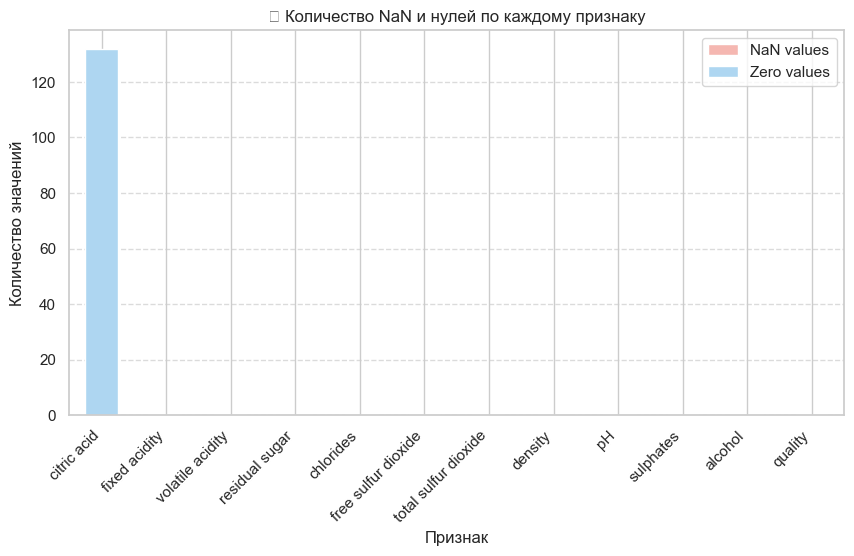

In [37]:
# Объединённый график NaN + нули
nan_counts = df.isnull().sum()
zero_counts = (df == 0).sum()

missing_df = pd.DataFrame({
    'NaN values': nan_counts,
    'Zero values': zero_counts
}).sort_values('Zero values', ascending=False)

plt.figure(figsize=(10,5))
missing_df.plot(kind='bar', stacked=True, figsize=(10,5), color=["#F5B7B1", "#AED6F1"])
plt.title("🧱 Количество NaN и нулей по каждому признаку")
plt.xlabel("Признак")
plt.ylabel("Количество значений")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


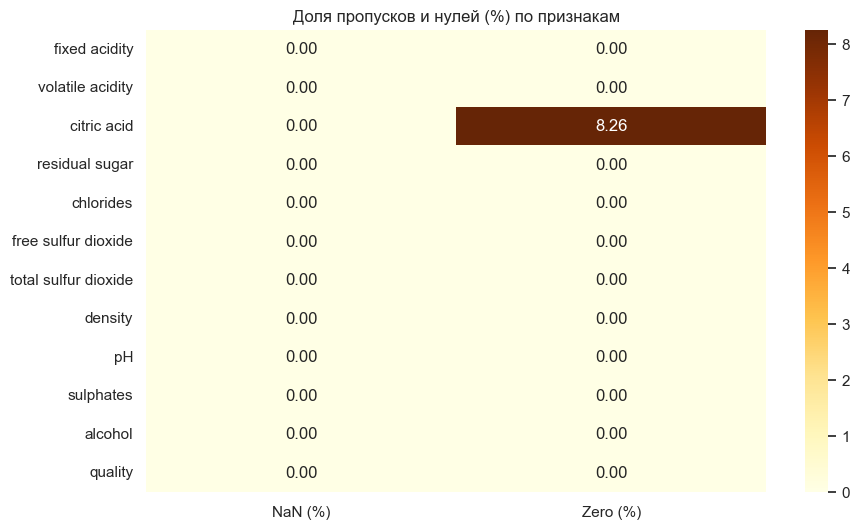

In [39]:
nan_percent = (df.isnull().sum() / len(df)) * 100
zero_percent = ((df == 0).sum() / len(df)) * 100

stats_df = pd.DataFrame({
    'NaN (%)': nan_percent,
    'Zero (%)': zero_percent
})

plt.figure(figsize=(10,6))
sns.heatmap(stats_df, annot=True, fmt=".2f", cmap="YlOrBr")
plt.title("Доля пропусков и нулей (%) по признакам")
plt.show()


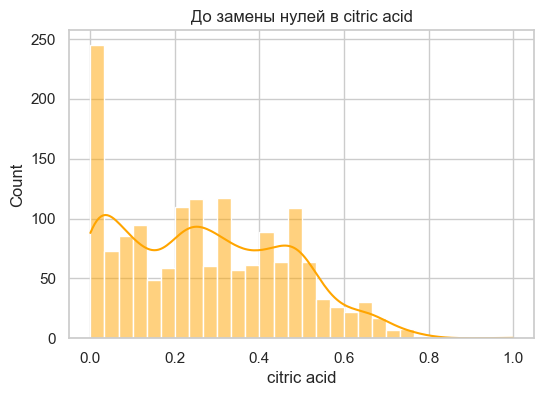

🔧 В 'citric acid' заменено 132 нуля на медиану (0.280)


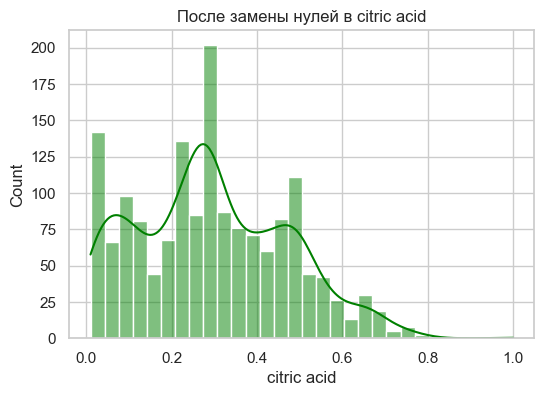

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
# Проверим распределение до замены
plt.figure(figsize=(6,4))
sns.histplot(df['citric acid'], bins=30, kde=True, color='orange')
plt.title("До замены нулей в citric acid")
plt.show()

# Заменим нули медианой
median_citric = df.loc[df['citric acid'] > 0, 'citric acid'].median()
df.loc[df['citric acid'] == 0, 'citric acid'] = median_citric
print(f"🔧 В 'citric acid' заменено 132 нуля на медиану ({median_citric:.3f})")

# Проверим результат
plt.figure(figsize=(6,4))
sns.histplot(df['citric acid'], bins=30, kde=True, color='green')
plt.title("После замены нулей в citric acid")
plt.show()

# Убедимся, что нулей больше нет
(df == 0).sum()


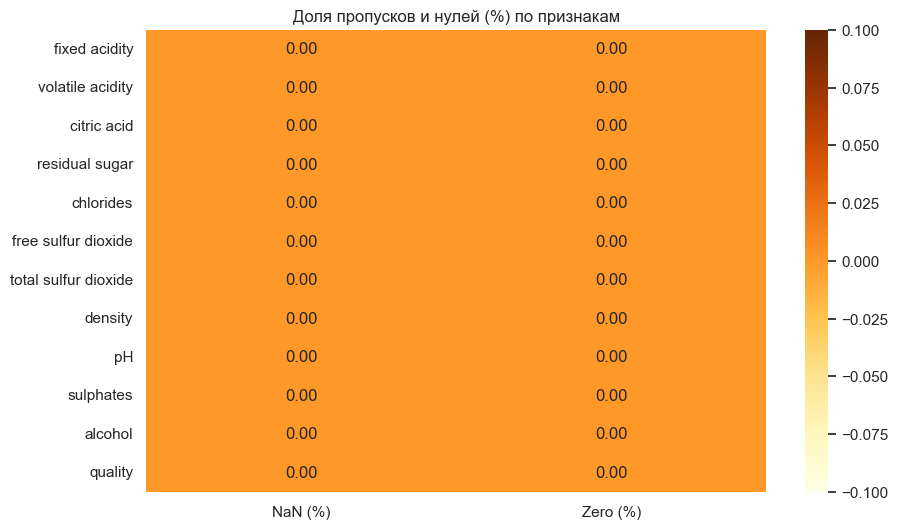

In [45]:
nan_percent = (df.isnull().sum() / len(df)) * 100
zero_percent = ((df == 0).sum() / len(df)) * 100

stats_df = pd.DataFrame({
    'NaN (%)': nan_percent,
    'Zero (%)': zero_percent
})

plt.figure(figsize=(10,6))
sns.heatmap(stats_df, annot=True, fmt=".2f", cmap="YlOrBr")
plt.title("Доля пропусков и нулей (%) по признакам")
plt.show()


In [23]:
# читаем как обычный текст
with open("winequality-red.csv", "r") as f:
    lines = [line.strip() for line in f.readlines()]

# разбиваем строки по запятой или точке с запятой
if "," in lines[0] and ";" not in lines[0]:
    split_char = ","
else:
    split_char = ";"

# преобразуем вручную в DataFrame
data = [line.split(split_char) for line in lines]
columns = data[0]
rows = data[1:]
df = pd.DataFrame(rows, columns=columns)

# преобразуем все числовые колонки
df = df.apply(pd.to_numeric, errors="ignore")

print(" Колонки:", df.columns.tolist())
print(" Размер датасета:", df.shape)
df.head()


 Колонки: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
 Размер датасета: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


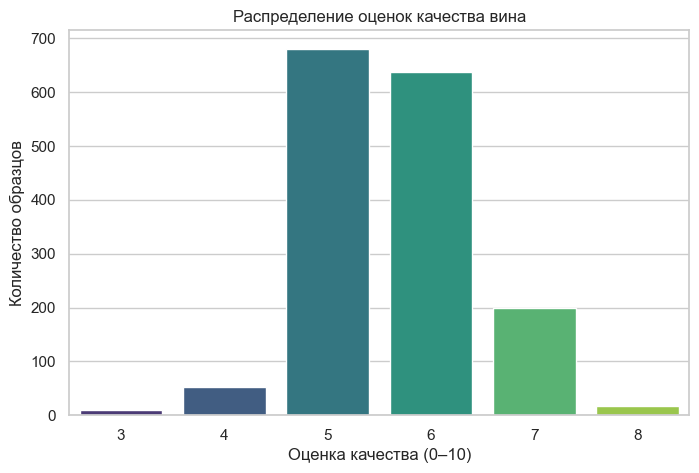

In [24]:

# Распределение целевой переменной (качество вина)
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Распределение оценок качества вина")
plt.xlabel("Оценка качества (0–10)")
plt.ylabel("Количество образцов")
plt.show()


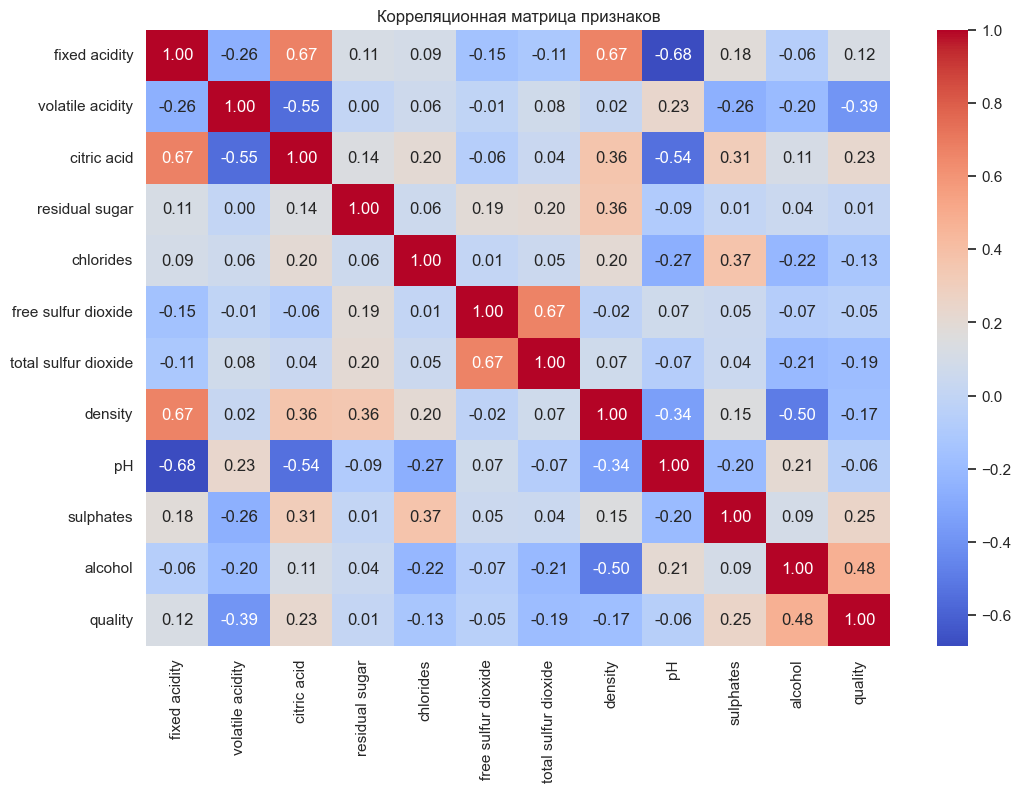

Корреляция признаков с качеством вина:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [25]:

# Корреляционная матрица признаков
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

# Корреляция признаков с качеством
corr_with_target = df.corr()["quality"].sort_values(ascending=False)
print("Корреляция признаков с качеством вина:")
print(corr_with_target)


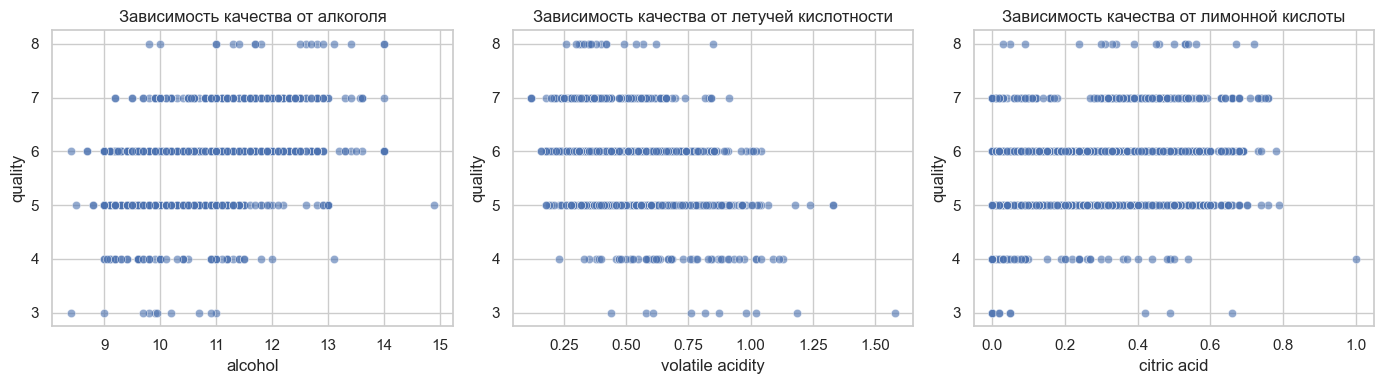

In [29]:
# Примеры пар scatterplot
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(x="alcohol", y="quality", data=df, alpha=0.6)
plt.title("Зависимость качества от алкоголя")

plt.subplot(1,3,2)
sns.scatterplot(x="volatile acidity", y="quality", data=df, alpha=0.6)
plt.title("Зависимость качества от летучей кислотности")

plt.subplot(1,3,3)
sns.scatterplot(x="citric acid", y="quality", data=df, alpha=0.6)
plt.title("Зависимость качества от лимонной кислоты")

plt.tight_layout()
plt.show()


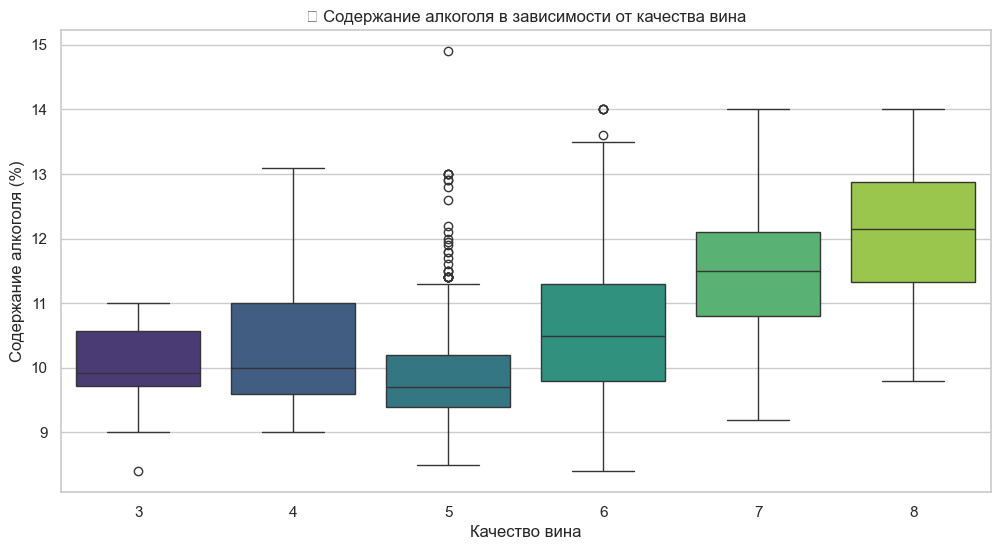

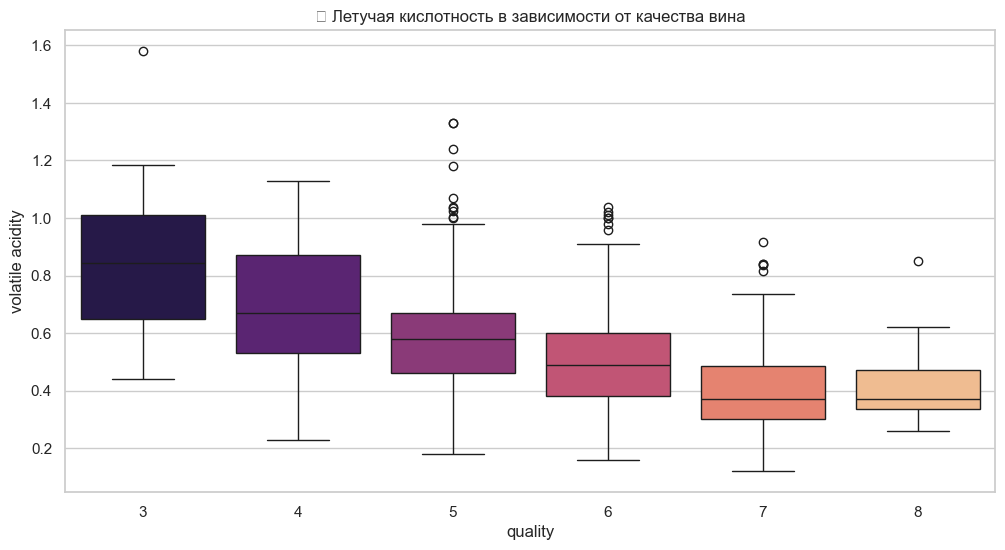

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x="quality", y="alcohol", data=df, palette="viridis")
plt.title("🍷 Содержание алкоголя в зависимости от качества вина")
plt.xlabel("Качество вина")
plt.ylabel("Содержание алкоголя (%)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="quality", y="volatile acidity", data=df, palette="magma")
plt.title("🍷 Летучая кислотность в зависимости от качества вина")
plt.show()


In [26]:

# Проверка выбросов с помощью Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(np.number)))
outliers = (z_scores > 3).sum(axis=0)
print("Количество выбросов по признакам (|z| > 3):")
print(outliers)


Количество выбросов по признакам (|z| > 3):
[12 10  1 30 31 22 15 18  8 27  8 10]


## ⚙️ PCA-анализ

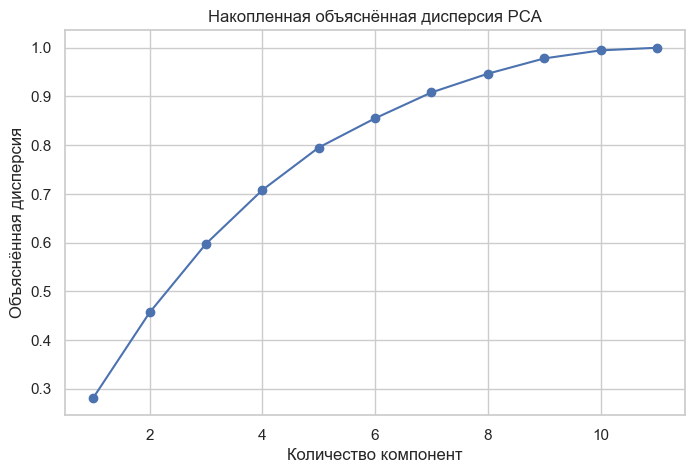

In [20]:

# Масштабируем данные
X = df.drop("quality", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Объяснённая дисперсия
explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Накопленная объяснённая дисперсия PCA")
plt.xlabel("Количество компонент")
plt.ylabel("Объяснённая дисперсия")
plt.grid(True)
plt.show()


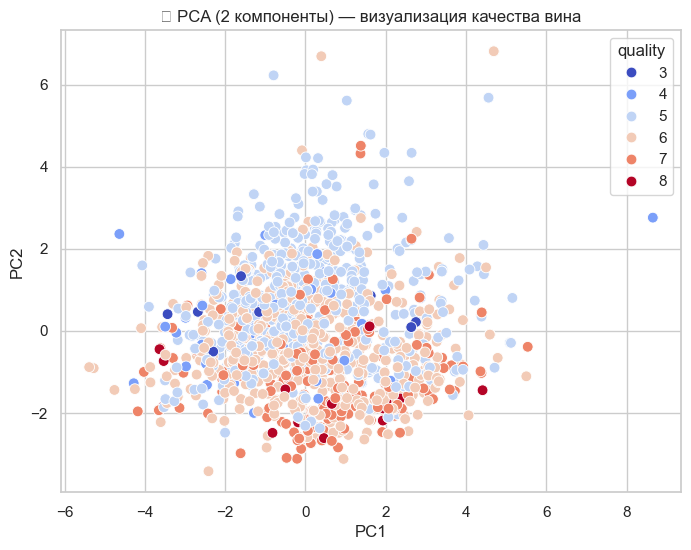

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop("quality", axis=1)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df["quality"], palette="coolwarm", s=60)
plt.title("🧩 PCA (2 компоненты) — визуализация качества вина")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


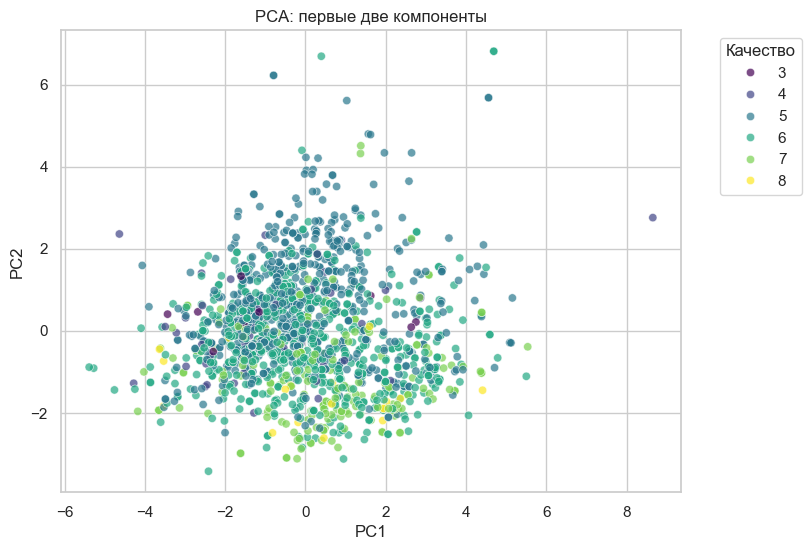

In [21]:

# Визуализация первых двух компонент PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["quality"], palette="viridis", alpha=0.7)
plt.title("PCA: первые две компоненты")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Качество", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [22]:

# Посмотрим, какие признаки сильнее всего влияют на PC1 и PC2
loadings = pd.DataFrame(
    pca.components_.T, 
    index=X.columns, 
    columns=[f"PC{i}" for i in range(1, len(X.columns)+1)]
)
display(loadings[["PC1", "PC2"]].sort_values(by="PC1", ascending=False).head(10))


,PC1,PC2
fixed acidity,0.489314,-0.110503
citric acid,0.463632,-0.151791
density,0.395353,0.233575
sulphates,0.242921,-0.037554
chlorides,0.212247,0.148052
residual sugar,0.146107,0.272080
total sulfur dioxide,0.023575,0.569487
free sulfur dioxide,-0.036158,0.513567
alcohol,-0.113232,-0.386181
volatile acidity,-0.238584,0.274930



### 📊 Выводы:
- Датасет не содержит пропусков, все данные числовые и чистые.  
- Наибольшее влияние на качество оказывают признаки **alcohol**, **volatile acidity** и **citric acid**.  
- PCA показывает, что первые 2–3 компоненты объясняют большую часть дисперсии.  
- Первая компонента в основном отражает вклад алкоголя и кислотности.  
- Результаты PCA можно использовать для визуализации или снижения размерности перед моделированием.
